In [1]:
import sklearn as sk
import pandas as pd
# Comment out if you did not ever face ssl error
import ssl
import numpy as np
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
df = pd.read_csv('./Obrist2014_Smell_5_1.csv')
df = df[['T_TitleOfExp', 'T_Trigger']]
df.columns = ['title', 'trigger']
df.head(2)

,title,trigger
0,It Wasn't Gas I Passed,The smell was in comparison to rotten eggs and...
1,The Foul Litter box,Whenever I walked into my brother's apartment ...


In [3]:
# Create an empty df for better computation speed
indices = [x for x in range(len(df))]
df_text = pd.DataFrame(columns=['text'], index=indices)

In [4]:
# Now doing row-wise combinination of title and text
for index, row in df.iterrows():
    df_text.iloc[index]['text'] = (row.title).strip() + ". " + (row.trigger).strip()

In [5]:
df = df_text
del df_text
df

,text
0,It Wasn't Gas I Passed. The smell was in compa...
1,The Foul Litter box. Whenever I walked into my...
2,"I Can't Smell You. I, just tonight, had a cowo..."
3,Dragon Breath Teacher. Once a teacher yelled a...
4,The day I took a plunge. I was playing in a fi...
...,...
434,New car smell. One particular smell experience...
435,New Purse. I had been obsessing over a Marc Ja...
436,Building a PC: A newcomer's experience. I was ...
437,"Scent of Skin. Smell of the skin, when growing..."


In [6]:
# remove punctuation marks
import string

punctuation = string.punctuation

df['text'] = df['text'].apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))

# convert text to lowercase
df['text'] = df['text'].str.lower()

# remove numbers
df['text'] = df['text'].str.replace("[0-9]", " ")
df

<ipython-input-6-b86b3f79d5c3>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace("[0-9]", " ")


,text
0,it wasnt gas i passed the smell was in compari...
1,the foul litter box whenever i walked into my ...
2,i cant smell you i just tonight had a coworker...
3,dragon breath teacher once a teacher yelled at...
4,the day i took a plunge i was playing in a fie...
...,...
434,new car smell one particular smell experience ...
435,new purse i had been obsessing over a marc jac...
436,building a pc a newcomers experience i was unp...
437,scent of skin smell of the skin when growing u...


## Remove stopwords

In [7]:
import nltk 
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

for i, row in df.iterrows():
    line = row.text
    
    querywords = line.split()

    resultwords  = [word for word in querywords if word.lower() not in stopwords]
    result = ' '.join(resultwords)
    
    df.at[i, 'text'] = result


[nltk_data] Downloading package stopwords to /Users/danny/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df

,text
0,wasnt gas passed smell comparison rotten eggs ...
1,foul litter box whenever walked brothers apart...
2,cant smell tonight coworker fart office left l...
3,dragon breath teacher teacher yelled class got...
4,day took plunge playing field friends tripped ...
...,...
434,new car smell one particular smell experience ...
435,new purse obsessing marc jacobs purse since sa...
436,building pc newcomers experience unpacking com...
437,scent skin smell skin growing heard much never...


In [9]:
# remove whitespaces
df['text'] = df['text'].apply(lambda x:' '.join(x.split()))

In [10]:
# Lemmatize

# import spaCy's language model
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# function to lemmatize text
def lemmatization(texts):
    output = []
    for i in texts:
        s = [token.lemma_ for token in nlp(i)]
        output.append(' '.join(s))
    return output

In [11]:
df['text'] = lemmatization(df['text'])
df

,text
0,be nt gas pass smell comparison rotten egg rea...
1,foul litter box whenever walk brother apartmen...
2,ca nt smell tonight coworker fart office leave...
3,dragon breath teacher teacher yell class get c...
4,day take plunge playing field friend trip bush...
...,...
434,new car smell one particular smell experience ...
435,new purse obsessing marc jacob purse since see...
436,build pc newcomer experience unpack component ...
437,scent skin smell skin grow hear much never rea...


In [12]:
# remove whitespaces
df['text'] = df['text'].apply(lambda x:' '.join(x.split()))

In [13]:
df

,text
0,be nt gas pass smell comparison rotten egg rea...
1,foul litter box whenever walk brother apartmen...
2,ca nt smell tonight coworker fart office leave...
3,dragon breath teacher teacher yell class get c...
4,day take plunge playing field friend trip bush...
...,...
434,new car smell one particular smell experience ...
435,new purse obsessing marc jacob purse since see...
436,build pc newcomer experience unpack component ...
437,scent skin smell skin grow hear much never rea...


In [14]:
# def identify_tokens(row):
#     story = row['text']
#     tokens = nltk.word_tokenize(story)
#     # taken only words (not punctuation)
#     token_words = [w for w in tokens if w.isalpha()]
#     return token_words

# df['text'] = df.apply(identify_tokens, axis=1)

## ELMo sentence embedding

In [15]:
## ELMo
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [16]:
elmo_url = "https://tfhub.dev/google/elmo/3"
embed = hub.KerasLayer(elmo_url)

In [17]:
for line in df.values:
    print(line)
    print("\n")

['be nt gas pass smell comparison rotten egg reason memorable source smell come mouth small room full people assume someone release gas embarrassed fess real source needless say call mom come get leave quickly could sure figured source go long smell like']


['foul litter box whenever walk brother apartment smell hit immediately entire living room fill smell urine fece less extent whole apartment smell emanate gigantic red litter pan sit right beside entranceway unfortunately brother roommate four adorable cat could never keep litter pan clean smell deaden sense make feel bit dizzy urine strong smell like noxious mix chemical smile try gag cat cute stink certainly do nt mention later know fault help drag belonging try breathe mouth inhale eventually leave room order keep retch still like cat vow never let cat litter pan stink terribly']


['ca nt smell tonight coworker fart office leave leave come window make sniff gesture ask smell yet act like do nt keep satisfaction inside actually 

In [18]:
embedded_lines = []

for line in df.values:
    embedded_line = embed(np.array(line))
    embedded_lines.append(embedded_line)

In [19]:
embedded_lines

[<tf.Tensor: shape=(1, 1024), dtype=float32, numpy=
 array([[ 0.37688693, -0.22628167, -0.01849407, ...,  0.05464257,
          0.4383302 ,  0.03964343]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1024), dtype=float32, numpy=
 array([[ 0.34311518, -0.2754287 , -0.12441669, ...,  0.16470721,
          0.34379002,  0.18067272]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1024), dtype=float32, numpy=
 array([[ 0.2774488 , -0.2684448 ,  0.12023599, ..., -0.03820139,
          0.3480568 ,  0.04312051]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1024), dtype=float32, numpy=
 array([[ 0.3035422 , -0.23874664, -0.12375522, ..., -0.04397037,
          0.23785168, -0.00275594]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1024), dtype=float32, numpy=
 array([[ 0.35451666, -0.329299  , -0.12737681, ...,  0.14805028,
          0.37072307,  0.39812762]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1024), dtype=float32, numpy=
 array([[ 0.2844104 , -0.14936984, -0.05568806, ..., -0.02628406,
          0.2765234 , 

In [20]:
len(embedded_lines) 

439

In [26]:
df.values[0]

array(['be nt gas pass smell comparison rotten egg reason memorable source smell come mouth small room full people assume someone release gas embarrassed fess real source needless say call mom come get leave quickly could sure figured source go long smell like'],
      dtype=object)

In [35]:
for x in embedded_lines:
#     x = tf.reshape(x, [1024])
    print(x)

tf.Tensor(
[[ 0.37688693 -0.22628167 -0.01849407 ...  0.05464257  0.4383302
   0.03964343]], shape=(1, 1024), dtype=float32)
tf.Tensor(
[[ 0.34311518 -0.2754287  -0.12441669 ...  0.16470721  0.34379002
   0.18067272]], shape=(1, 1024), dtype=float32)
tf.Tensor(
[[ 0.2774488  -0.2684448   0.12023599 ... -0.03820139  0.3480568
   0.04312051]], shape=(1, 1024), dtype=float32)
tf.Tensor(
[[ 0.3035422  -0.23874664 -0.12375522 ... -0.04397037  0.23785168
  -0.00275594]], shape=(1, 1024), dtype=float32)
tf.Tensor(
[[ 0.35451666 -0.329299   -0.12737681 ...  0.14805028  0.37072307
   0.39812762]], shape=(1, 1024), dtype=float32)
tf.Tensor(
[[ 0.2844104  -0.14936984 -0.05568806 ... -0.02628406  0.2765234
   0.02578247]], shape=(1, 1024), dtype=float32)
tf.Tensor(
[[ 0.23321638 -0.605741   -0.05570493 ... -0.10643327  0.29618305
   0.4493824 ]], shape=(1, 1024), dtype=float32)
tf.Tensor(
[[-0.01811844  0.25566044  0.522284   ... -0.15884697  0.4516281
   0.29307386]], shape=(1, 1024), dtype=float

## Visualization

In [27]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [48]:
def visualise_sentence_embeddings(perplexity=20):
    sentences = []
    sentence_vectors = []
    for sentence, vector in zip([str(x) for x in range(len(embedded_lines))], embedded_lines):
        sentences.append(sentence)
        # vector reshaping
        vector = tf.reshape(vector, [1024])
        sentence_vectors.append(vector)

    # print(embeddings.keys())
    # print('Total words:', len(words), '\tWord Embedding shapes:', word_vectors.shape)

    tsne = TSNE(n_components=3, random_state=0, n_iter=10000, perplexity=perplexity)
    np.set_printoptions(suppress=True)
    T = tsne.fit_transform(sentence_vectors)
    labels = sentences
    # print(labels)

    plt.figure(figsize=(14, 8))
    plt.scatter(T[:, 0], T[:, 1], c='steelblue', edgecolors='k')
    for label, x, y in zip(labels, T[:, 0], T[:, 1]):
         plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

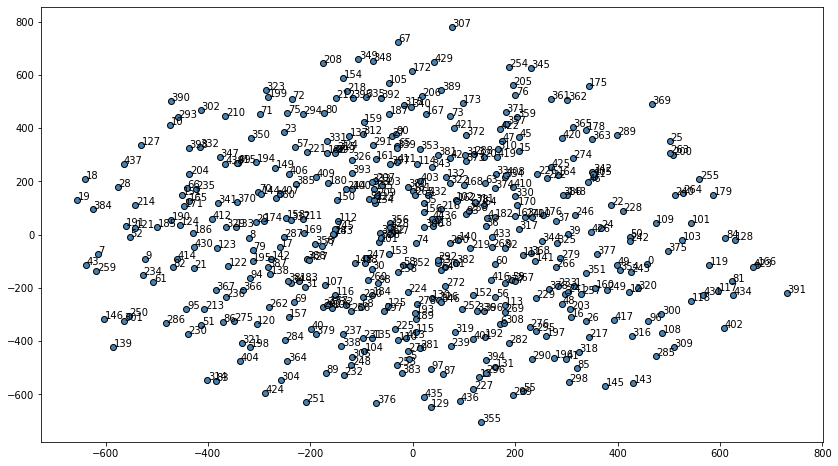

In [49]:
visualise_sentence_embeddings()  # perplexity=20

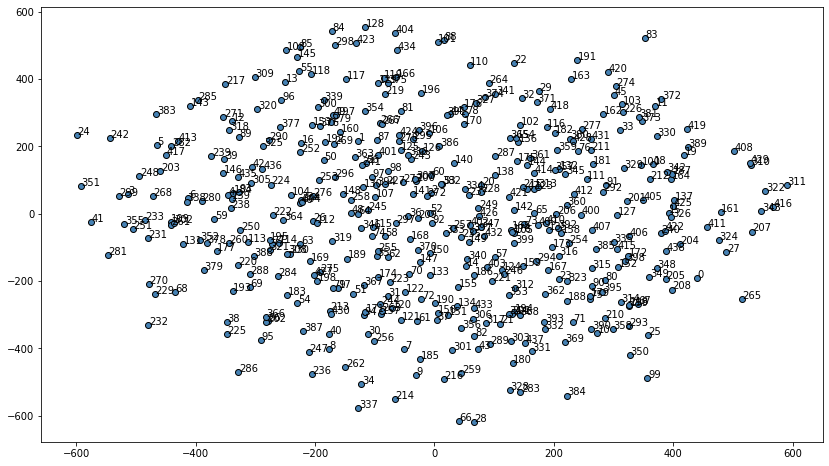

In [50]:
visualise_sentence_embeddings(perplexity=10)

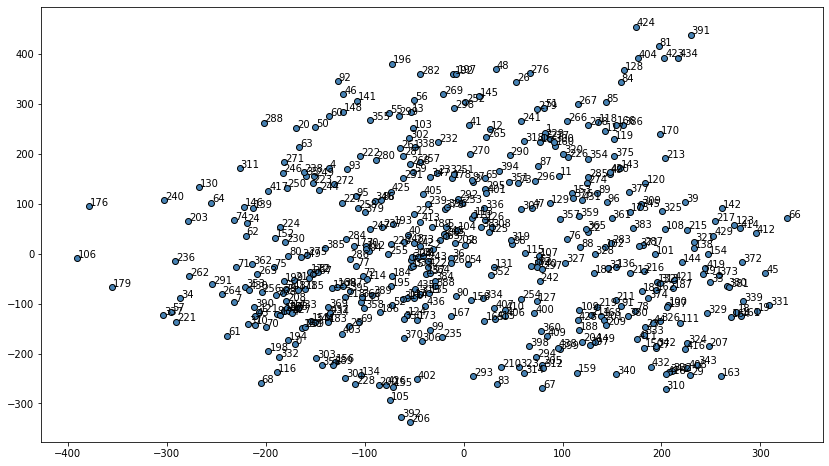

In [51]:
visualise_sentence_embeddings(perplexity=5)

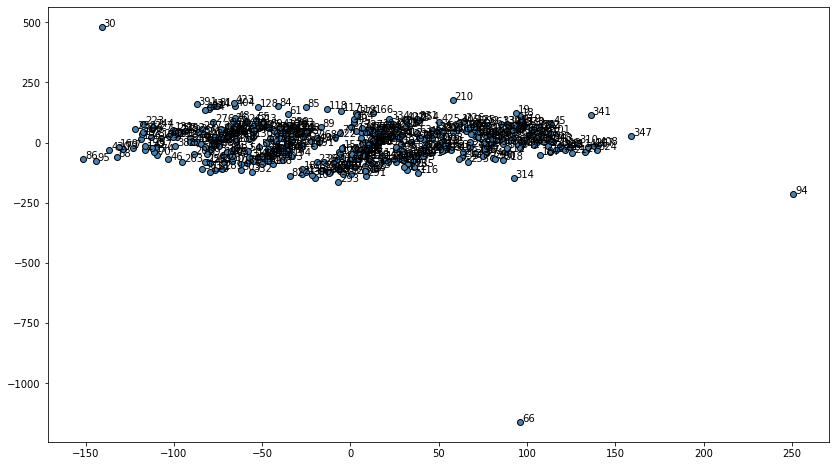

In [54]:
visualise_sentence_embeddings(perplexity=3)

In [55]:
df.values[86]

array(['cut grass memory childhood remember kid germany live apartment build really big grass area back use play every would cut grass smell always bring back memory kid germany kinda make depressed happy time'],
      dtype=object)

In [56]:
df.values[95]

array(['gratitude grass remember clearly smell fresh cut grass child reason remember clearly read johnny get gun dalton trumbo horrify upset book deeply move story intensely grateful one piece able hear see speak move run outside summertime lie freshly mow grass feel heat sun intense feel gratitude able experience rather horror warfare ever since smell fresh cut grass bring back memory memory child summer everything world seem simple even do nt make sense'],
      dtype=object)

In [44]:
df.values[68]

array(['school every spring smell sunny clear cool morning always remind end end school year little kid every time smell air time year react way wish back school month hang friend play sport fun'],
      dtype=object)

In [42]:
df.values[30]

array(['homemade bread come home bad day school walk house could smell bake bread be nt uncommon experience time make feel much calm relax able shift mood positive one I ve remember day since even though decade'],
      dtype=object)

In [43]:
df.values[66]

array(['good part wake young would wake morning smell coffee would make feel happy vacation well smell coffee hotel cabin'],
      dtype=object)